In [76]:
%pip install numpy 
%pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import numpy as np
import matplotlib.pyplot as mplt
np.set_printoptions(precision=4, suppress=True)


## Dataset

In [78]:
M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
T = [3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

## Dataset visualization

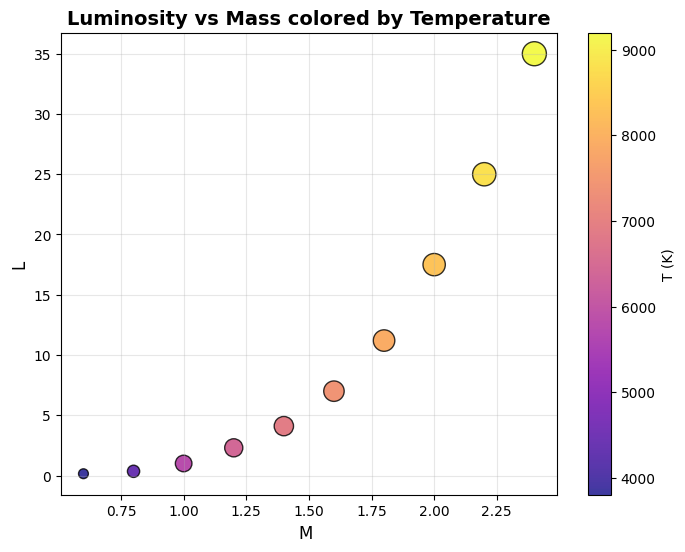

In [79]:
M_arr = np.array(M)
T_arr = np.array(T)
L_arr = np.array(L)

T_min, T_max = T_arr.min(), T_arr.max()
T_norm = (T_arr - T_min) / (T_max - T_min + 1e-8)

sizes = 50 + 250 * T_norm  
colors = T_arr              

mplt.figure(figsize=(8, 6))
scatter = mplt.scatter(M_arr, L_arr, s=sizes, c=colors, cmap='plasma', alpha=0.8, edgecolors='black')
mplt.xlabel("M ", fontsize=12)
mplt.ylabel("L", fontsize=12)
mplt.title("Luminosity vs Mass colored by Temperature", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
cbar = mplt.colorbar(scatter)
cbar.set_label("T (K)")
mplt.show()


## Feature engineering

In [80]:
M = np.array(M, dtype=float)
T = np.array(T, dtype=float)
L = np.array(L, dtype=float)

X = np.column_stack((M, T, M**2, M*T))
y = L


print(X)

[[    0.6   3800.       0.36  2280.  ]
 [    0.8   4400.       0.64  3520.  ]
 [    1.    5800.       1.    5800.  ]
 [    1.2   6400.       1.44  7680.  ]
 [    1.4   6900.       1.96  9660.  ]
 [    1.6   7400.       2.56 11840.  ]
 [    1.8   7900.       3.24 14220.  ]
 [    2.    8300.       4.   16600.  ]
 [    2.2   8800.       4.84 19360.  ]
 [    2.4   9200.       5.76 22080.  ]]


## Model Implementation

### Hypothesis

In [81]:

def predict(X, w, b):
    return X @ w + b  


### Cost Function

In [82]:

def compute_cost(X, y, w, b):

    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, y, w_test, b_test))


Cost with w=0, b=0: 117.69675


### Gradients 

In [83]:
def compute_gradient(X, y, w, b):

    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, y, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)


Gradient at w=0, b=0:
dj_dw: [    -21.523   -87845.         -45.9434 -185408.8   ]
dj_db: -10.36


Iteration    0: cost = 149.7504
Iteration   10: cost = 2437.6180
Iteration   20: cost = 45131.1233
Iteration   30: cost = 839480.4551
Iteration   40: cost = 15617774.6027
Iteration   50: cost = 290556560.9805
Iteration   60: cost = 5405580672.3058
Iteration   70: cost = 100566659800.0975
Iteration   80: cost = 1870965153167.7534
Iteration   90: cost = 34807863873116.4492
Iteration  100: cost = 647573465149989.6250
Iteration  110: cost = 12047604940511482.0000
Iteration  120: cost = 224136399364385600.0000
Iteration  130: cost = 4169884866584832512.0000
Iteration  140: cost = 77577492321115783168.0000
Iteration  150: cost = 1443269420472461426688.0000
Iteration  160: cost = 26850914585491657457664.0000
Iteration  170: cost = 499540559683828750221312.0000
Iteration  180: cost = 9293566890420464827498496.0000
Iteration  190: cost = 172899645228778675563921408.0000
Iteration  200: cost = 3216664567298876570402291712.0000
Iteration  210: cost = 59843563732158817420032606208.0000
Iteration  

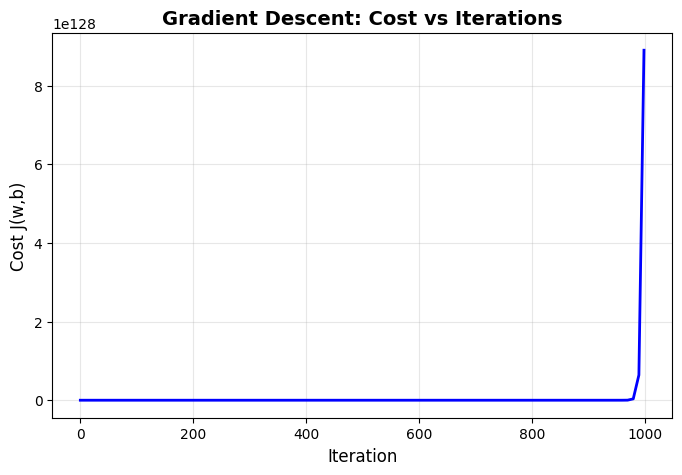

In [84]:


def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):

    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 1e-8
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

mplt.figure(figsize=(8, 5))
mplt.plot(it_hist, cost_hist, 'b-', linewidth=2)
mplt.xlabel("Iteration", fontsize=12)
mplt.ylabel("Cost J(w,b)", fontsize=12)
mplt.title("Gradient Descent: Cost vs Iterations", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.show()


## Experiment 

Iteration    0: cost =  59.9813
Iteration   10: cost =  41.1645
Iteration   20: cost =  41.1645
Iteration   30: cost =  41.1645
Iteration   40: cost =  41.1645
Iteration   50: cost =  41.1645
Iteration   60: cost =  41.1645
Iteration   70: cost =  41.1645
Iteration   80: cost =  41.1645
Iteration   90: cost =  41.1645
Iteration  100: cost =  41.1645
Iteration  110: cost =  41.1645
Iteration  120: cost =  41.1645
Iteration  130: cost =  41.1645
Iteration  140: cost =  41.1645
Iteration  150: cost =  41.1645
Iteration  160: cost =  41.1645
Iteration  170: cost =  41.1645
Iteration  180: cost =  41.1645
Iteration  190: cost =  41.1645
Iteration  200: cost =  41.1645
Iteration  210: cost =  41.1645
Iteration  220: cost =  41.1645
Iteration  230: cost =  41.1645
Iteration  240: cost =  41.1645
Iteration  250: cost =  41.1645
Iteration  260: cost =  41.1645
Iteration  270: cost =  41.1645
Iteration  280: cost =  41.1645
Iteration  290: cost =  41.1645
Iteration  300: cost =  41.1645
Iteratio

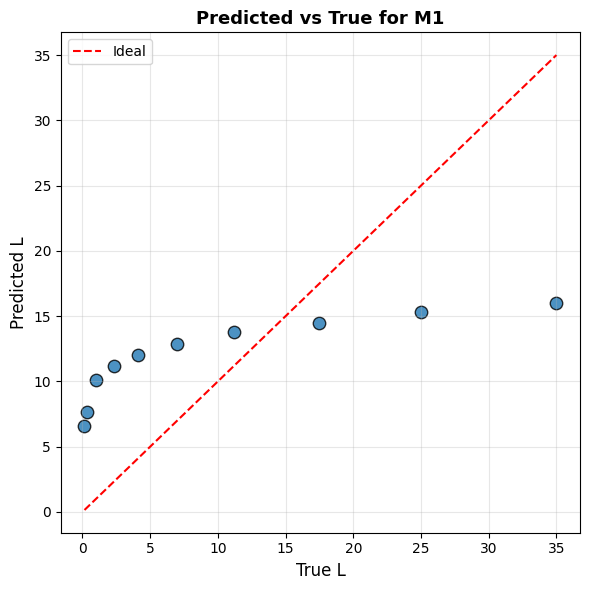

Iteration    0: cost =  59.9813
Iteration   10: cost =  41.1645
Iteration   20: cost =  41.1645
Iteration   30: cost =  41.1645
Iteration   40: cost =  41.1645
Iteration   50: cost =  41.1645
Iteration   60: cost =  41.1645
Iteration   70: cost =  41.1644
Iteration   80: cost =  41.1644
Iteration   90: cost =  41.1644
Iteration  100: cost =  41.1644
Iteration  110: cost =  41.1644
Iteration  120: cost =  41.1644
Iteration  130: cost =  41.1644
Iteration  140: cost =  41.1644
Iteration  150: cost =  41.1644
Iteration  160: cost =  41.1643
Iteration  170: cost =  41.1643
Iteration  180: cost =  41.1643
Iteration  190: cost =  41.1643
Iteration  200: cost =  41.1643
Iteration  210: cost =  41.1643
Iteration  220: cost =  41.1643
Iteration  230: cost =  41.1643
Iteration  240: cost =  41.1643
Iteration  250: cost =  41.1643
Iteration  260: cost =  41.1642
Iteration  270: cost =  41.1642
Iteration  280: cost =  41.1642
Iteration  290: cost =  41.1642
Iteration  300: cost =  41.1642
Iteratio

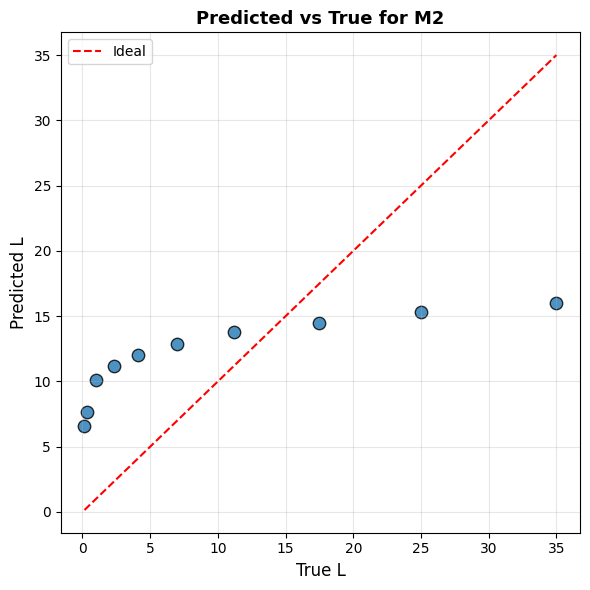

Iteration    0: cost = 149.7504
Iteration   10: cost = 2437.6180
Iteration   20: cost = 45131.1233
Iteration   30: cost = 839480.4551
Iteration   40: cost = 15617774.6027
Iteration   50: cost = 290556560.9805
Iteration   60: cost = 5405580672.3058
Iteration   70: cost = 100566659800.0975
Iteration   80: cost = 1870965153167.7534
Iteration   90: cost = 34807863873116.4492
Iteration  100: cost = 647573465149989.6250
Iteration  110: cost = 12047604940511482.0000
Iteration  120: cost = 224136399364385600.0000
Iteration  130: cost = 4169884866584832512.0000
Iteration  140: cost = 77577492321115783168.0000
Iteration  150: cost = 1443269420472461426688.0000
Iteration  160: cost = 26850914585491657457664.0000
Iteration  170: cost = 499540559683828750221312.0000
Iteration  180: cost = 9293566890420464827498496.0000
Iteration  190: cost = 172899645228778675563921408.0000
Iteration  200: cost = 3216664567298876570402291712.0000
Iteration  210: cost = 59843563732158817420032606208.0000
Iteration  

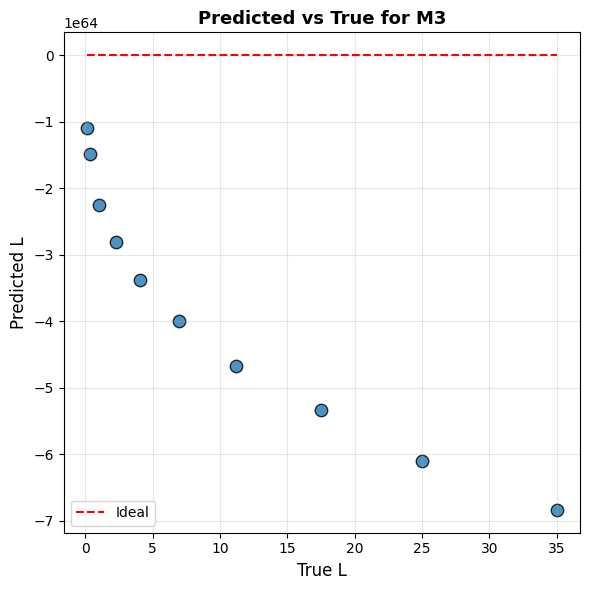


SUMMARY OF MODELS (M1, M2, M3)
Name	Final cost
M1	41.1645
M2	41.1635
M3	889976317915416138294552473232738408135899413884164726378620427177597281922925247273745976350264951450860993323210963376924524544.0000


In [85]:

X_M1 = np.column_stack((M, T))

X_M2 = np.column_stack((M, T, M**2))

X_M3 = np.column_stack((M, T, M**2, M*T))


def train_model(X_model, y, alpha, num_iterations):
    n_model = X_model.shape[1]
    w0 = np.zeros(n_model)
    b0 = 0.0
    w_tr, b_tr, it_hist, cost_hist = gradient_descent(X_model, y, w0, b0, alpha, num_iterations)
    final_cost = compute_cost(X_model, y, w_tr, b_tr)
    return w_tr, b_tr, final_cost, it_hist, cost_hist

alpha_exp = 1e-8  
num_iter_exp = 1000

results = []

for name, X_model in [("M1", X_M1), ("M2", X_M2), ("M3", X_M3)]:
    w_tr, b_tr, final_cost, it_hist, cost_hist = train_model(X_model, y, alpha_exp, num_iter_exp)
    results.append({
        'name': name,
        'X': X_model,
        'w': w_tr,
        'b': b_tr,
        'final_cost': final_cost,
        'it_hist': it_hist,
        'cost_hist': cost_hist,
    })

   
    y_pred = predict(X_model, w_tr, b_tr)
    mplt.figure(figsize=(6, 6))
    mplt.scatter(y, y_pred, s=80, alpha=0.8, edgecolors='black')
    mplt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
    mplt.xlabel("True L", fontsize=12)
    mplt.ylabel("Predicted L", fontsize=12)
    mplt.title(f"Predicted vs True for {name}", fontsize=13, fontweight='bold')
    mplt.grid(True, alpha=0.3)
    mplt.legend()
    mplt.tight_layout()
    mplt.show()

print("\nSUMMARY OF MODELS (M1, M2, M3)")
print("Name\tFinal cost")
for r in results:
    print(f"{r['name']}\t{r['final_cost']:.4f}")


Learned w_MT = -2532461028521466663426786997255245743618291028353919102222336.000000


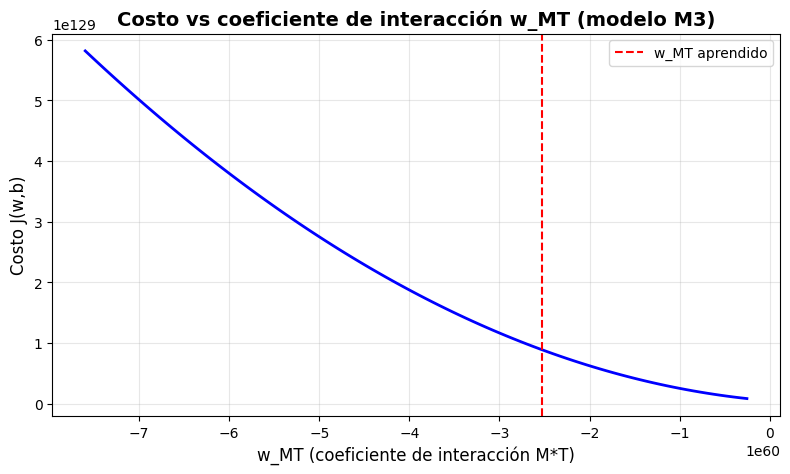

In [86]:

res_M3 = next(r for r in results if r['name'] == 'M3')
X_M3 = res_M3['X']
w_M3 = res_M3['w'].copy()
b_M3 = res_M3['b']

idx_MT = X_M3.shape[1] - 1

w_MT_learned = w_M3[idx_MT]
print(f"Learned w_MT = {w_MT_learned:.6f}")

w_MT_values = np.linspace(w_MT_learned * 0.1, w_MT_learned * 3.0, 100)
J_values = []

for w_mt in w_MT_values:
    w_temp = w_M3.copy()
    w_temp[idx_MT] = w_mt
    J_val = compute_cost(X_M3, y, w_temp, b_M3)
    J_values.append(J_val)

J_values = np.array(J_values)

mplt.figure(figsize=(8, 5))
mplt.plot(w_MT_values, J_values, 'b-', linewidth=2)
mplt.axvline(w_MT_learned, color='red', linestyle='--', label='w_MT aprendido')
mplt.xlabel("w_MT (coeficiente de interacción M*T)", fontsize=12)
mplt.ylabel("Costo J(w,b)", fontsize=12)
mplt.title("Costo vs coeficiente de interacción w_MT (modelo M3)", fontsize=14, fontweight='bold')
mplt.grid(True, alpha=0.3)
mplt.legend()
mplt.tight_layout()
mplt.show()




In [88]:

M_new = 1.3
T_new = 6600.0

M_new_features = np.array([[M_new, T_new, M_new**2, M_new * T_new]])

L_pred_new = predict(M_new_features, w_M3, b_M3)[0]

print("New star:")
print(f"  M = {M_new} (solar masses)")
print(f"  T = {T_new} K")
print(f"Predicted luminosity (model M3): L ≈ {L_pred_new:.3f} (solar units)")




New star:
  M = 1.3 (solar masses)
  T = 6600.0 K
Predicted luminosity (model M3): L ≈ -30674190212219073836299919969005725834079058164198894689522286592.000 (solar units)


## Analisis

 For masses close to 1 M_sun and temperatures ~6000-7000 K, we expect a luminosity of order unity or a few times larger. \
 If the prediction is in that range, the model is reasonable given the small dataset.
